In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_rr.csv'

df_rr = pd.read_csv(url)
df_rr["DATE"] = pd.to_datetime(df_rr["DATE"],dayfirst=True)
for col in df_rr.columns[1:]:
    df_rr[col] = pd.to_numeric(df_rr[col],errors='coerce')

print(df_rr)

           DATE     WTI_HH   NCF_RCF   NCF_WTI     NCF_HH    NCF_NBP  \
0    2009-01-05   8.337907  0.920024  1.597408  13.319039   9.317755   
1    2009-01-06   7.960656  0.918079  1.673188  13.319672   9.094982   
2    2009-01-07   7.258065  0.911884  1.839766  13.353141   8.969184   
3    2009-01-08   6.993289  0.942262  1.898992  13.280201   9.340782   
4    2009-01-09   7.266071  0.920958  1.889899  13.732143   9.019865   
...         ...        ...       ...       ...        ...        ...   
2850 2020-08-25  16.996063  1.017382  1.152421  19.586614  15.375235   
2851 2020-08-26  17.146825  1.015322  1.150197  19.722222  15.008563   
2852 2020-08-27  17.015873  1.018405  1.161381  19.761905  14.134232   
2853 2020-08-28  17.463415  0.969349  1.177840  20.569106  13.098330   
2854 2020-08-31  18.526087  0.982042  1.219197  22.586957  13.412611   

         NCF_B     RCF_B    RCF_NBP     WTI_B  ...  NCF_RCF_r  NCF_WTI_r  \
0     1.564893  1.700927  10.127733  0.979645  ...   0.0023

In [8]:
## markov regime switching for price ratio returns ##

mod = sm.tsa.MarkovRegression(df_rr['NBP_HH'], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 NBP_HH   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -1692.030
Date:                Tue, 18 Jan 2022   AIC                           3396.059
Time:                        16:59:28   BIC                           3431.800
Sample:                             0   HQIC                          3408.947
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4415      0.010    142.314      0.000       1.422       1.461
sigma2         0.0847      0.004     21.406      0.000       0.077       0.092
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5942      0.013    192.316      0.000       2.568       2.621
sigma2         0.2888      0.010     29.402      0.000       0.270       0.308
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9934      0.003    391.823      0.000       0.988       0.998
p[1->0]        0.0046      0.002      2.811      0.005       0.001       0.008
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

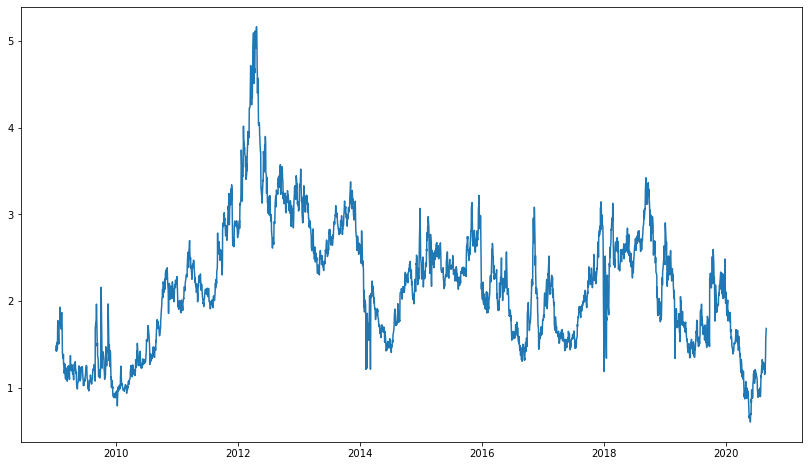

In [6]:
plt.figure(figsize=(14,8)) 
plt.plot(df_rr["DATE"],df_rr["NBP_HH"])